## Logistic Regression on PCA components

In [79]:
###  This cell contains the plotting related function

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [6]:
## Read Data

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

## Load Iris Dataset and use all four features
iris = pd.read_csv('iris.csv')

y = iris.iloc[:, 5].values
class_mapping = {label:idx+1 for idx,label in 
                 enumerate(np.unique(y))}
iris['Species'] = iris['Species'].map(class_mapping)
y = iris.iloc[:, 5].values
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [6]:
x.shape

(150, 2)

## Part 1

In [2]:
x = iris.iloc[:, [1,3]].values

X_train, X_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.3, random_state=0)

lr = LogisticRegression(C=10.0, random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/Users/sharang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sharang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


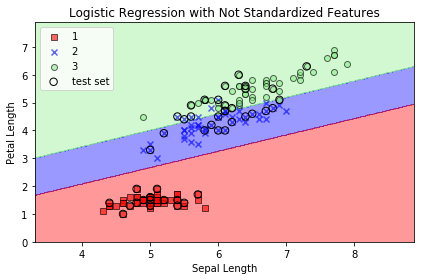

Misclassified samples: 7
Accuracy: 0.84


In [82]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.title('Logistic Regression with Not Standardized Features')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print('Misclassified samples: %d' %(y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

## Part 2

In [83]:
## Implement PCA and use all components 
## giving the explained variance of each Principal Component

x, y = iris.iloc[:, 1:5].values, iris.iloc[:, 5].values # y is species

X_train, X_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print("Explained variance of each principal component:")
pca.explained_variance_ratio_

Explained variance of each principal component:


array([0.71803699, 0.24442718, 0.03337158, 0.00416425])

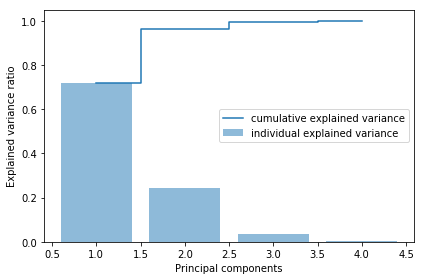

In [90]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat) 
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 5), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 5), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [85]:
x = iris.iloc[:, [1,3]].values

X_train, X_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression(C=10.0, random_state=0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


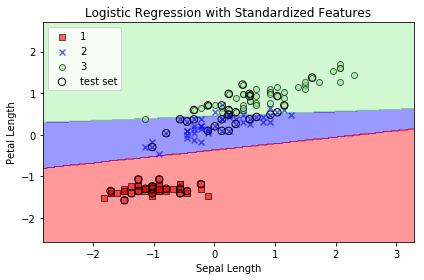

Misclassified samples: 4
Accuracy: 0.91


In [86]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.title('Logistic Regression with Standardized Features')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print('Misclassified samples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

## Part 3

In [87]:
## Use 2 components that explain maximum variance and perform a 
## ML study using Logistic Regression model

x = iris.iloc[:, 1:5].values

X_train, X_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

pca2 = PCA(n_components=2)
X_train_pca_scikit = pca2.fit_transform(X_train_std)
X_test_pca_scikit = pca2.transform(X_test_std)

lr = LogisticRegression(C=17, random_state=0)
lr.fit(X_train_pca_scikit, y_train) 
y_pred = lr.predict(X_test_pca_scikit)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


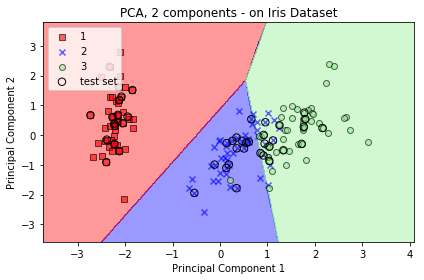

Misclassified samples: 4
Accuracy: 0.91


In [88]:
X_combined_std = np.vstack((X_train_pca_scikit, X_test_pca_scikit))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.title('PCA, 2 components - on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print('Misclassified samples: %d' %(y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

In [11]:
from IPython.display import Image
# Image(filename=r'iris-task-1-case-1.png')

In [12]:
from IPython.display import Image
# Image(filename=r'iris-task-1-case-2.png')

In [13]:
from IPython.display import Image
# Image(filename=r'iris-task-1-case-3.png')

### Explain what you observed?

I observed that the performance of the logistic rergession was the highest when implementing it on two standardized components. This method yielded an accuracy score of 0.91 which equalled the performance of the PCA with two components implementation. Both their decision regions plots were similar in that they covered similar amounts of the setosa and versicolor predictions. I also used logistic regression without PCA on two of the features once without standardizing. The regression on the standardized features had the better performance; an accuracy score of 0.91 vs 0.84.

Also, I observed that the results of the regression and the plot of the decision regions were impacted significantly if I changed the mapping of the y values to (1,2,3) vs. (0,1,2).

# AdalineGD and AdalineSGD

In this exercise, we will take two features iris dataset and train using AdalineGD vs. AdalineSGD based on the implementation provided below and the perceptron model implementations from scikit-learn and one provided below.  
You should have three plot (Adaline Rule vs. AdalineSGD vs. scikit Perceptron) along with performance comparison between these four methods. What do you observe in terms of performance difference? Please explain your interpretation. 

However, you are free to use any combination of two features out of 4 features given in this dataset. 


In [91]:
# Sebastian Raschka's implementation of the Adaline Rule
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.
        (After training, we can look at this to see if our algorithm converged)
    """
    def __init__(self, eta=0.01, n_iter=50, debug=False):
        self.eta = eta
        self.n_iter = n_iter
        self.debug = debug

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        if self.debug: print("Initial Weights:", self.w_)
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression, we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            if self.debug: print("New Weights:", self.w_)
            if self.debug: print("Cost:", cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
    
## your code here

In [93]:
x, y = iris.iloc[:, [1,3]].values, iris.iloc[:, 5].values # y is species
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ada = AdalineGD(n_iter=30,eta=0.01, debug=False)
ada.fit(X_train_std, y_train)
y_pred = ada.predict(X_test_std)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


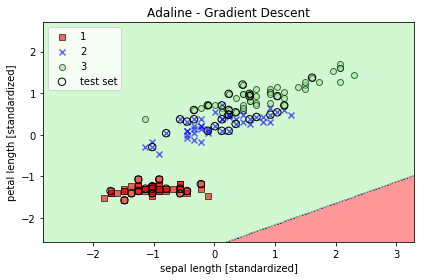

Misclassified samples: 29
Accuracy: 0.36


In [94]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined, y=y_combined, classifier=ada,test_idx=range(105, 150))
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print('Misclassified samples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

In [95]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value averaged over all
        training samples in each epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
    
## your code here

In [ ]:
adasgd = AdalineSGD(n_iter=30, eta=0.01)
# We are using all but the first input sample to train (no split)
adasgd.fit(X_train_std, y_train)
y_pred = adasgd.predict(X_test_std)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


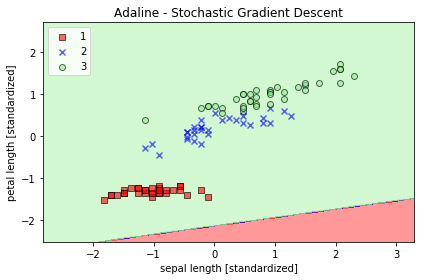

Misclassified samples: 29
Accuracy: 0.36


In [96]:
plot_decision_regions(X_train_std, y_train, classifier=adasgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print('Misclassified samples: %d' %(y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))

In [157]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

## your code here
x_ppn, y_ppn = iris.iloc[:, [1,3]].values, iris.iloc[:, 5].values 

X_train, X_test, y_train, y_test = \
    train_test_split(x_ppn, y_ppn, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ppn = Perceptron(max_iter=45, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


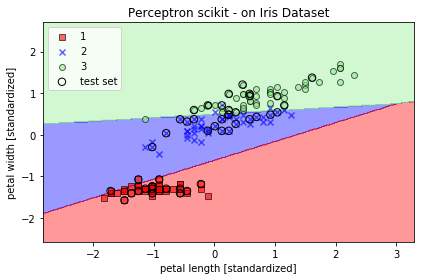

Misclassified samples: 3
Accuracy: 0.93


In [158]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.title('Perceptron scikit - on Iris Dataset')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

In [161]:
# Sebastian Raschka's implementation of the Perceptron Learning rule
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01,n_iter=10,debug=False,random_seed=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_seed = random_seed
        self.debug = debug

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_seed) 
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        if self.debug: print("Initial Weights:", self.w_)
        for iter in range(self.n_iter):
            errors = 0
            if self.debug: print("Iteration:", iter)
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                if self.debug: print(xi, target, self.predict(xi), update)
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                if self.debug: print("New Weights:", self.w_)
            self.errors_.append(errors) 
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [162]:
x_ppn, y_ppn = iris.iloc[:, [1,3]].values, iris.iloc[:, 5].values 

X_train, X_test, y_train, y_test = \
    train_test_split(x_ppn, y_ppn, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ppn = Perceptron(n_iter=45, eta=0.1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


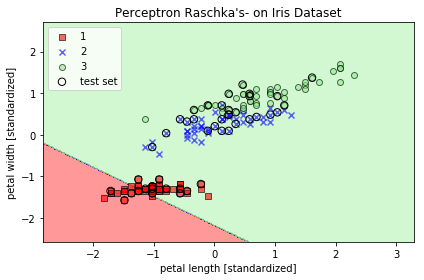

Misclassified samples: 33
Accuracy: 0.27


In [163]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.title('Perceptron Raschka\'s- on Iris Dataset')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

## Observations

The Adaline rule and Adaline SGD both returned an accuracy score of 0.36, which tells us that these models are not very good algorithms to train this particular data set. The Perceptron rule according to Sebastian Raschka's implementation also performed poorly with an accuracy score of 0.27. But the scikit Perceptron algorithm performed really well and provided a very high accuracy score of 0.93.

In [23]:
from IPython.display import Image
# Image(filename=r'iris-task-2-adaline.png')

In [24]:
from IPython.display import Image
# Image(filename=r'task-2-adalineSGD.png')

In [25]:
from IPython.display import Image
# Image(filename=r'iris-task-2-perceptron.png')

## Explore parameter tuning in Scikit Logistic regression

We have seen that the 'C' parameter in logistic regression determines the strength of logistic regression. In this exercise, you will tune the 'C' parameter to get best performance from the model for iris data classification. 
Write the code to run logistic regression on iris data and report the performance for 10 different values of 'C' (just Accuracy will do).

In [7]:
c_values = []
accuracy_scores = []
for c in range(1,20,2):
    x, y = iris.iloc[:, 1:5].values, iris.iloc[:, 5].values # y is species

    X_train, X_test, y_train, y_test = \
        train_test_split(x, y, test_size=0.3, random_state=0)

    sc = StandardScaler()
    sc.fit(X_train)
    
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    lr = LogisticRegression(C=c, random_state=0) # we will see the parameter C below
    lr.fit(X_train_std, y_train) # where learning from the training data occurs
    # Use the LR model to predict the test data
    y_pred = lr.predict(X_test_std)
    
    print('\nC: %d' % c)    
    print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))
    accuracy_scores.append(accuracy_score(y_test,y_pred))


C: 1
Accuracy: 0.82

C: 3
Accuracy: 0.89

C: 5
Accuracy: 0.96

C: 7
Accuracy: 0.96

C: 9
Accuracy: 0.96

C: 11
Accuracy: 0.96

C: 13
Accuracy: 0.96

C: 15
Accuracy: 0.98

C: 17
Accuracy: 0.98

C: 19
Accuracy: 0.98


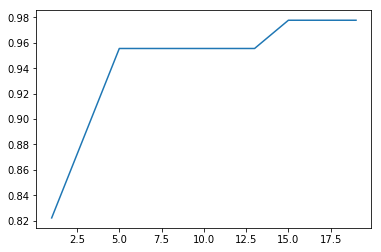

In [145]:
plt.plot(range(1,20,2),accuracy_scores)
plt.show()

## Explore parameter tuning in SVM

Similar to the previous task, use the SVM model for various kernels: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ and report the performance (just Accuracy will do). 

In [146]:
from sklearn.svm import SVC

kernels = ['linear','poly','rbf','sigmoid']
for k in kernels:
    svm = SVC(kernel=k, C=10.0, random_state=0)
    svm.fit(X_train_std, y_train)
    y_pred = svm.predict(X_test_std)
    print("\nKernel: {}".format(k))
    print('Accuracy: %.2f' % accuracy_score(y_test,y_pred))   
    


Kernel: linear
Accuracy: 0.98

Kernel: poly
Accuracy: 0.96

Kernel: rbf
Accuracy: 0.98

Kernel: sigmoid
Accuracy: 0.93
